# New York City Taxi Trip Duration

### Goal : predicts the total ride duration of taxi trips in New York City. 
### Evaluation Metric : Root Mean Squared Logarithmic Error. [ RMLSE ]

## 1. Bring the data

In [24]:
import pandas as pd
import numpy as np

train = pd.read_csv('data/train.csv', parse_dates = ["pickup_datetime",'dropoff_datetime'])
test = pd.read_csv('data/test.csv',parse_dates = ['pickup_datetime'])

In [25]:
print(train.shape)
train.head(5)

(1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [26]:
print(test.shape)
test.head(5)

(625134, 9)


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


## 2. Look around data / EDA 

### 1) value confirm

In [4]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [5]:
test.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')

### Value

#### id - a unique identifier for each trip
#### vendor_id - a code indicating the provider associated with the trip record
#### pickup_datetime - date and time when the meter was engaged
#### dropoff_datetime - date and time when the meter was disengaged
#### passenger_count - the number of passengers in the vehicle (driver entered value)
#### pickup_longitude - the longitude where the meter was engaged
#### pickup_latitude - the latitude where the meter was engaged
#### dropoff_longitude - the longitude where the meter was disengaged
#### dropoff_latitude - the latitude where the meter was disengaged
#### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; ;N=not a store and forward trip
#### trip_duration - duration of the trip in seconds

### 2) comfirm missing data

In [6]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

### 2-1) visualization missing data

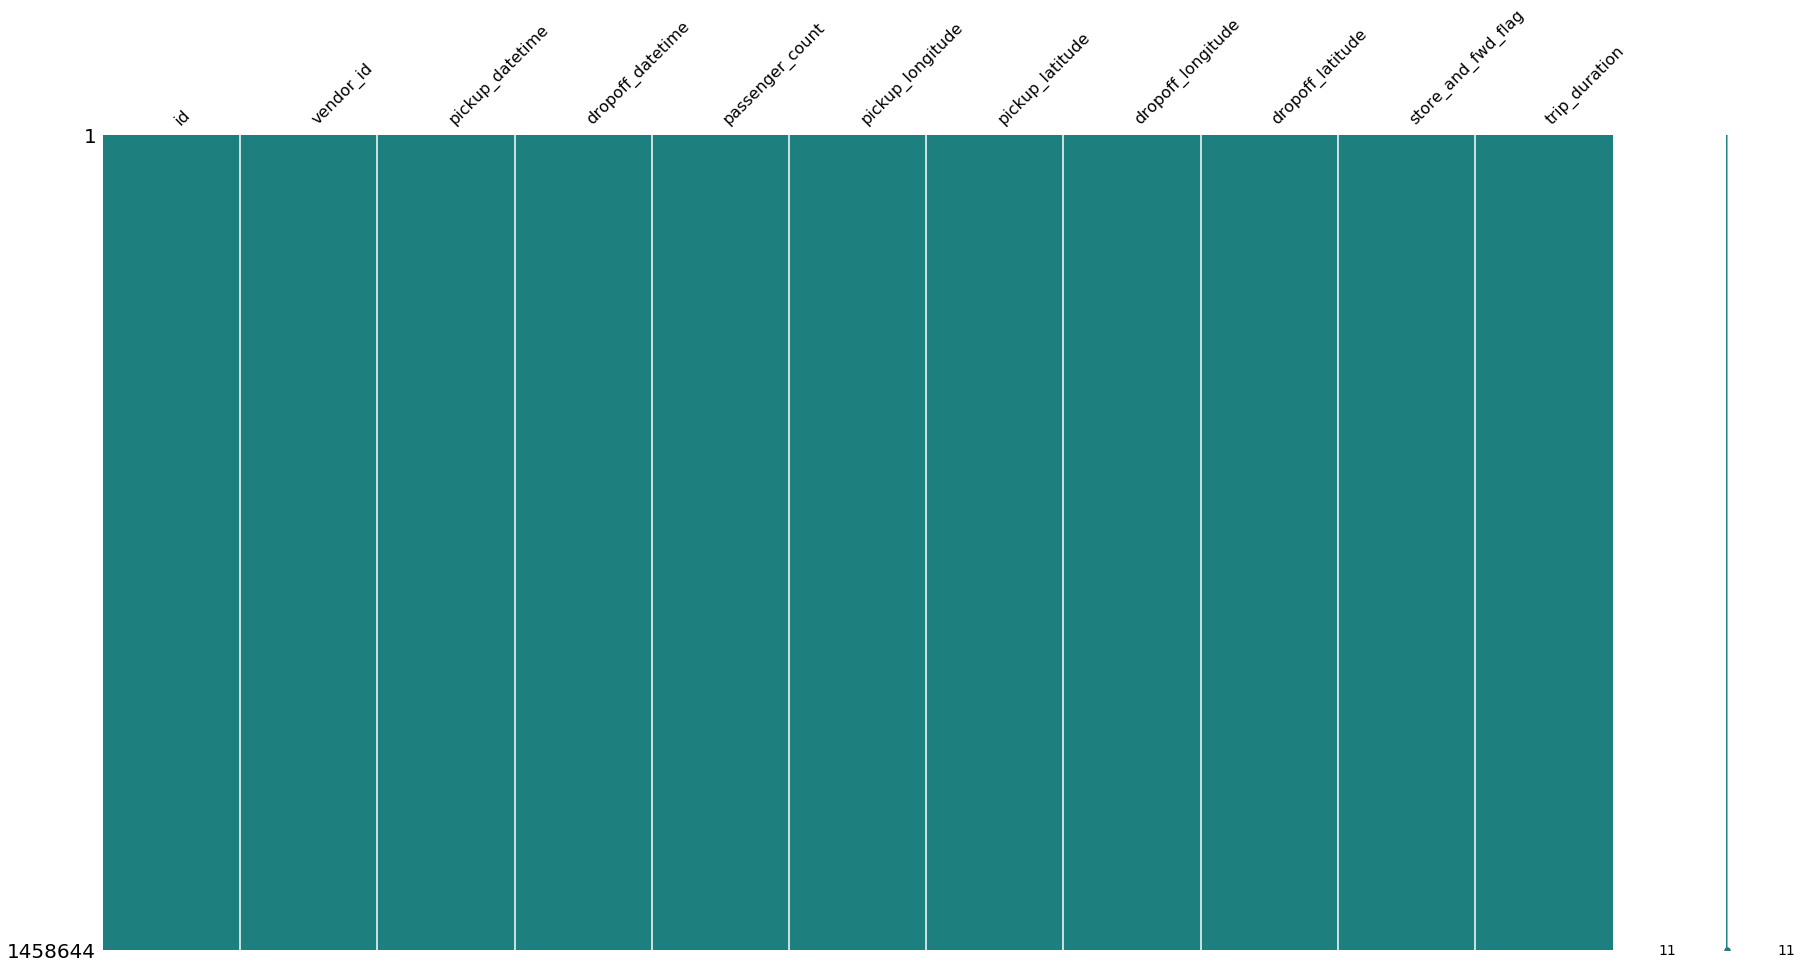

In [20]:
import missingno as msno

msno.matrix(df = train, figsize = (30,15), color = (0.12, 0.5, 0.5))

# color = (RGB[0~1],RGB_brighten[0~],mix_color )

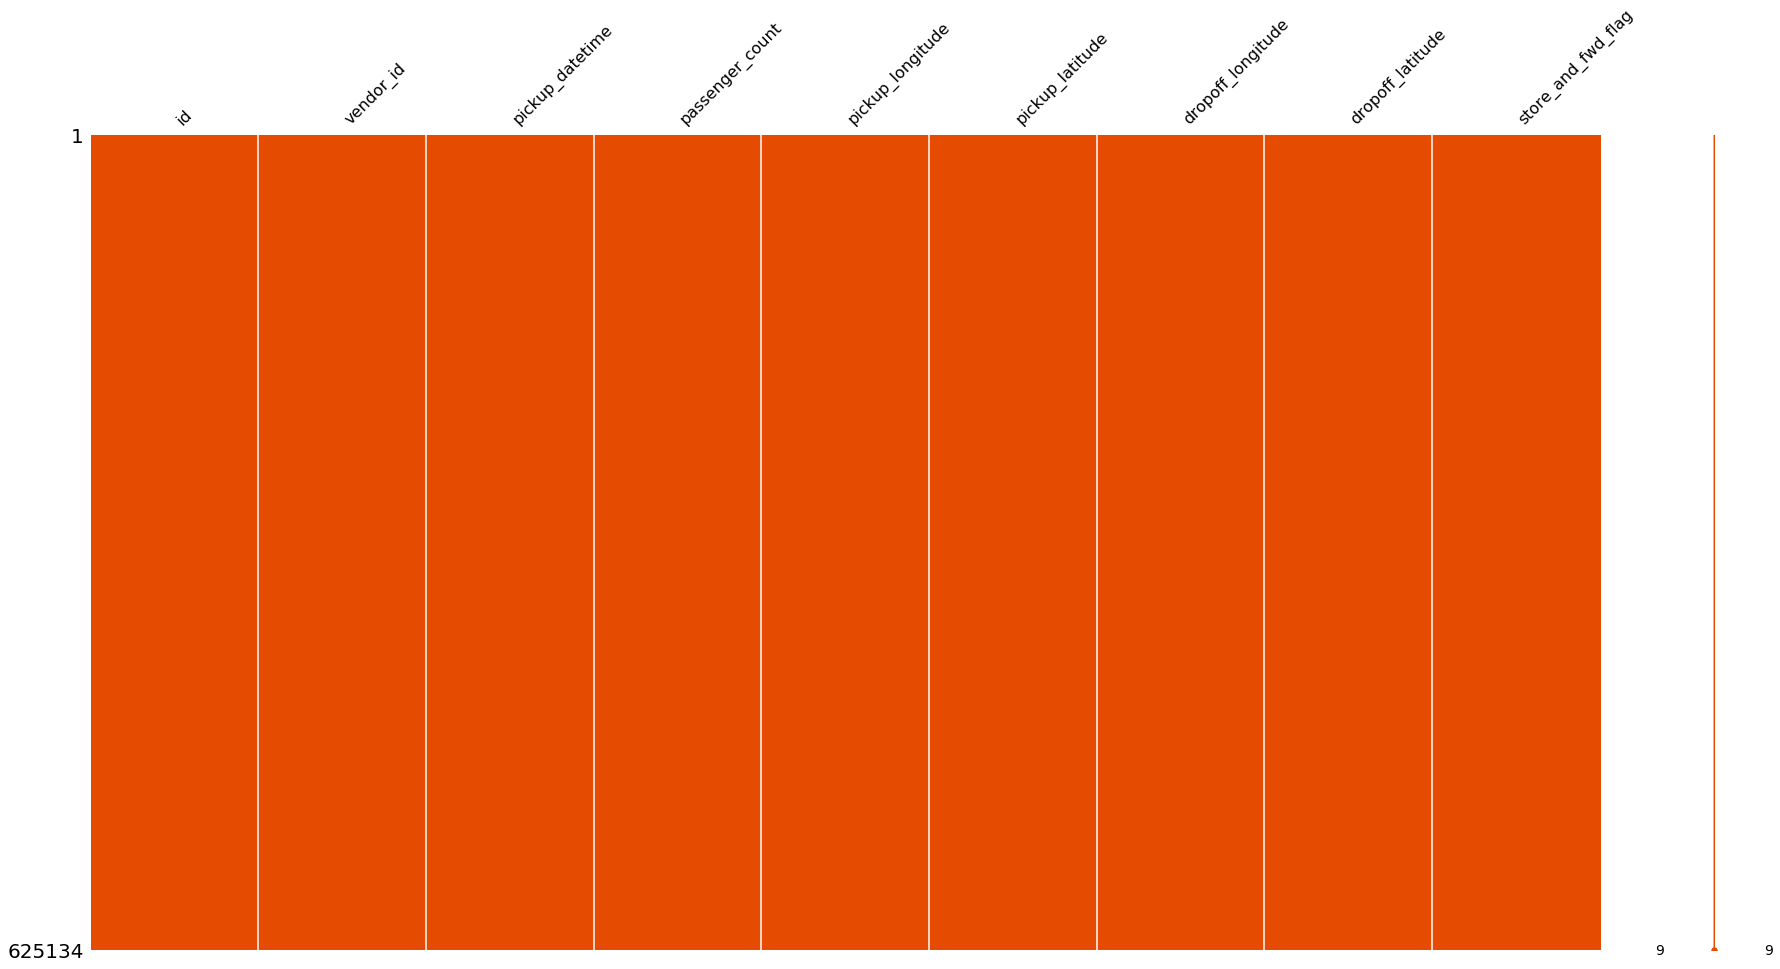

In [21]:
msno.matrix(df=test, figsize = (30,15), color = (0.9, 0.3, 0.01))

### 2-2) correlation with heatamp

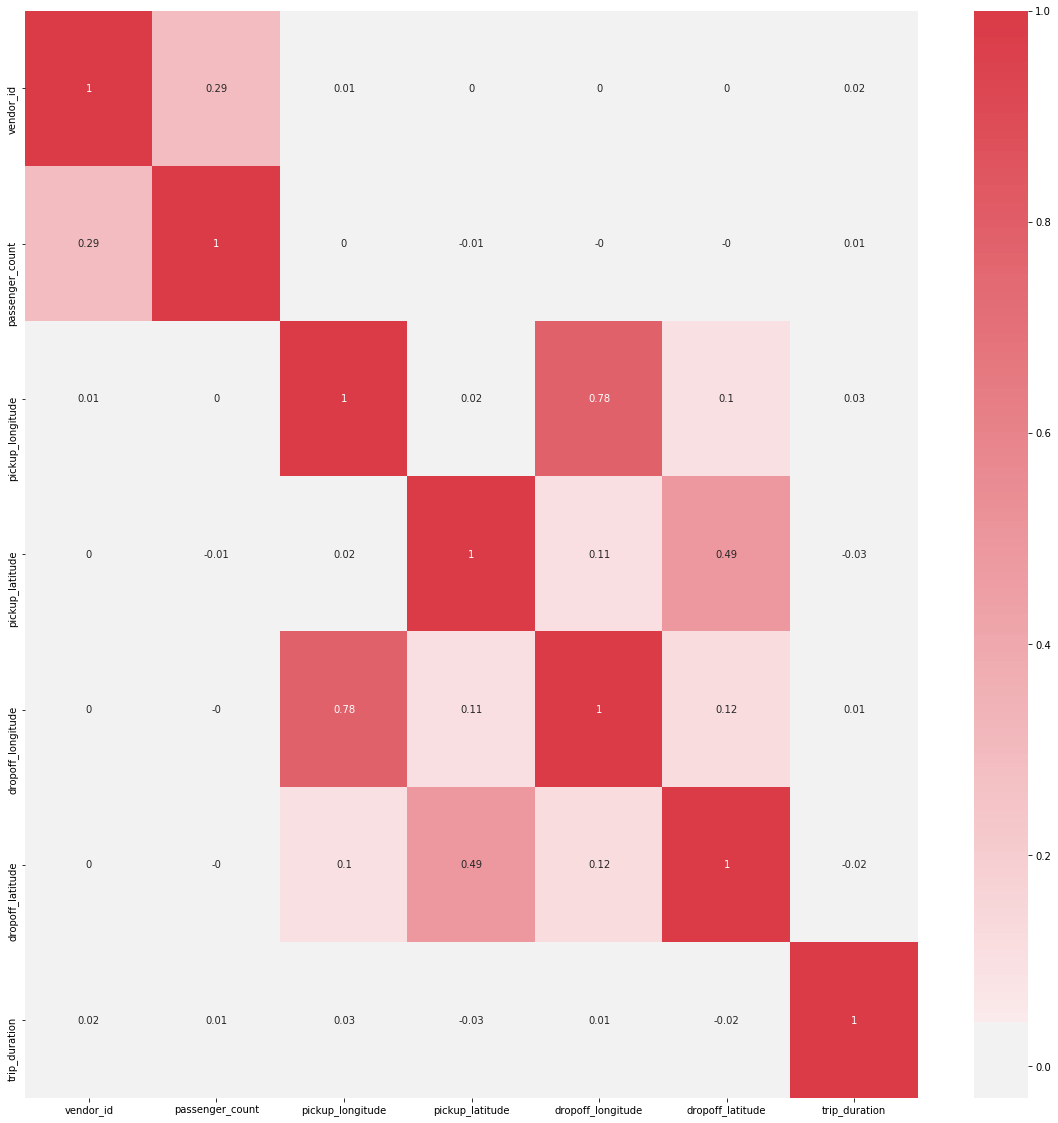

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

cor_matrix = train.corr().round(2)

fig = plt.figure(figsize = (20,20));
sns.heatmap(cor_matrix, annot =True , center = 0,
           cmap = sns.diverging_palette(250,10,as_cmap = True),
           ax = plt.subplot(111));

plt.show()

### 2-3) make some variables

In [27]:
train['pickup_datetime'].head()

0   2016-03-14 17:24:55
1   2016-06-12 00:43:35
2   2016-01-19 11:35:24
3   2016-04-06 19:32:31
4   2016-03-26 13:30:55
Name: pickup_datetime, dtype: datetime64[ns]

 #### pickup_datetime variables

In [28]:
train['pickup_year'] = train['pickup_datetime'].dt.year  
train['pickup_month'] = train['pickup_datetime'].dt.month
train['pickup_day'] = train['pickup_datetime'].dt.day
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train['pickup_minute'] = train['pickup_datetime'].dt.minute
train['pickup_second'] = train['pickup_datetime'].dt.second
train["pickup_dayofweek"] = train["pickup_datetime"].dt.dayofweek 

train[['pickup_year','pickup_month', 'pickup_day','pickup_hour','pickup_minute','pickup_second', 'pickup_dayofweek']].head()

,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_dayofweek
0,2016,3,14,17,24,55,0
1,2016,6,12,0,43,35,6
2,2016,1,19,11,35,24,1
3,2016,4,6,19,32,31,2
4,2016,3,26,13,30,55,5


In [29]:
# 'test data' doesn`t have dropoff_datetime 

test['pickup_year'] = test['pickup_datetime'].dt.year  
test['pickup_month'] = test['pickup_datetime'].dt.month
test['pickup_day'] = test['pickup_datetime'].dt.day
test['pickup_hour'] = test['pickup_datetime'].dt.hour
test['pickup_minute'] = test['pickup_datetime'].dt.minute
test['pickup_second'] = test['pickup_datetime'].dt.second
test["pickup_dayofweek"] = test["pickup_datetime"].dt.dayofweek 

test[['pickup_year','pickup_month', 'pickup_day','pickup_hour','pickup_minute','pickup_second', 'pickup_dayofweek']].head()

,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_dayofweek
0,2016,6,30,23,59,58,3
1,2016,6,30,23,59,53,3
2,2016,6,30,23,59,47,3
3,2016,6,30,23,59,41,3
4,2016,6,30,23,59,33,3


### *basic distance from two coordinates

In [30]:
from math import sin, cos, sqrt, atan2, radians # approximate radius of earth in km 
import numpy as np

def haversine(train):
    lon1 = train['pickup_longitude']
    lat1 = train['pickup_latitude']
    lon2 = train['dropoff_longitude']
    lat2 = train['dropoff_latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * np.arcsin(sqrt(a)) 
    km = 6367 * c
    return km

train['distance'] = train.apply(lambda train: haversine(train), axis=1)
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_dayofweek,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,14,17,24,55,0,1.497580
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,12,0,43,35,6,1.804374
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016,1,19,11,35,24,1,6.381090
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016,4,6,19,32,31,2,1.484566
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016,3,26,13,30,55,5,1.187842
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,2016,1,30,22,1,40,5,1.098252
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,2016,6,17,22,34,59,4,1.325446
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,2016,5,21,7,54,58,5,5.711393
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,2016,5,27,23,12,23,4,1.309531
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,2016,3,10,21,45,1,3,5.117946


In [31]:
import numpy as np

def haversine(test):
    lon1 = test['pickup_longitude']
    lat1 = test['pickup_latitude']
    lon2 = test['dropoff_longitude']
    lat2 = test['dropoff_latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * np.arcsin(sqrt(a)) 
    km = 6367 * c
    return km

test['distance'] = test.apply(lambda test: haversine(test), axis=1)
test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_dayofweek,distance
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2016,6,30,23,59,58,3,2.744701
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2016,6,30,23,59,53,3,2.757507
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,2016,6,30,23,59,47,3,1.305335
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,2016,6,30,23,59,41,3,5.265780
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,2016,6,30,23,59,33,3,0.960239
5,id0668992,1,2016-06-30 23:59:30,1,-73.991302,40.749798,-73.980515,40.786549,N,2016,6,30,23,59,30,3,4.183643
6,id1765014,1,2016-06-30 23:59:15,1,-73.978310,40.741550,-73.952072,40.717003,N,2016,6,30,23,59,15,3,3.510409
7,id0898117,1,2016-06-30 23:59:09,2,-74.012711,40.701527,-73.986481,40.719509,N,2016,6,30,23,59,9,3,2.979082
8,id3905224,2,2016-06-30 23:58:55,2,-73.992332,40.730511,-73.875618,40.875214,N,2016,6,30,23,58,55,3,18.840335
9,id1543102,2,2016-06-30 23:58:46,1,-73.993179,40.748760,-73.979309,40.761311,N,2016,6,30,23,58,46,3,1.818872


### *manhatandistnace from two coordinates

In [6]:
from math import sin, cos, sqrt, atan2, radians
# 지구 반지름 : 6367 km

# 경도 1도의 거리(km단위) = cos(위도)*6380 *2 * 3.14159 /360

# 위도 1도의 거리(km단위) = 6380 *2 *3.14159 /360

# 위도가 40도 일때 경도 1도의 거리
latitude_40 = cos(40)*6380 *2 * 3.14159 /360
latitude_40

print(latitude_40)
# 위도는 위치에 관계없이 약 111km 이다. 위도 : lattitude 경도 : longitude

-74.2648284987617


In [38]:
import numpy as np
train.loc[:,'man_distance'] = np.abs((train['pickup_latitude'] - train['dropoff_latitude'])*111)+ 
                              np.abs((train['pickup_longitude']-train['dropoff_longitude'])*85.397)
    
test.loc[:,'man_distance'] = np.abs((test['pickup_latitude'] - test['dropoff_latitude'])*111)+ 
                              np.abs((test['pickup_longitude']-test['dropoff_longitude'])*85.397)

train.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_dayofweek,distance,man_dist3,man_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,2016,3,14,17,24,55,0,1.497580,1.755698,1.755698
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2016,6,12,0,43,35,6,1.804374,2.450894,2.450894
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,2016,1,19,11,35,24,1,6.381090,8.224048,8.224048
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2016,4,6,19,32,31,2,1.484566,1.661247,1.661247
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,2016,3,26,13,30,55,5,1.187842,1.197531,1.197531


### 2-4) one_hot_encoding

In [39]:
train['store_and_fwd_flag_Y'] = train['store_and_fwd_flag'] == 'Y'
train['store_and_fwd_flag_N'] = train['store_and_fwd_flag'] == 'N'

train[['store_and_fwd_flag', 'store_and_fwd_flag_Y', 'store_and_fwd_flag_N']].head()

,store_and_fwd_flag,store_and_fwd_flag_Y,store_and_fwd_flag_N
0,N,False,True
1,N,False,True
2,N,False,True
3,N,False,True
4,N,False,True


In [40]:
test['store_and_fwd_flag_Y'] = test['store_and_fwd_flag'] == 'Y'
test['store_and_fwd_flag_N'] = test['store_and_fwd_flag'] == 'N'

test[['store_and_fwd_flag', 'store_and_fwd_flag_Y', 'store_and_fwd_flag_N']].head()

,store_and_fwd_flag,store_and_fwd_flag_Y,store_and_fwd_flag_N
0,N,False,True
1,N,False,True
2,N,False,True
3,N,False,True
4,N,False,True


### 2-5) Visualization 

#### 'datetime' for 'trip_duration'

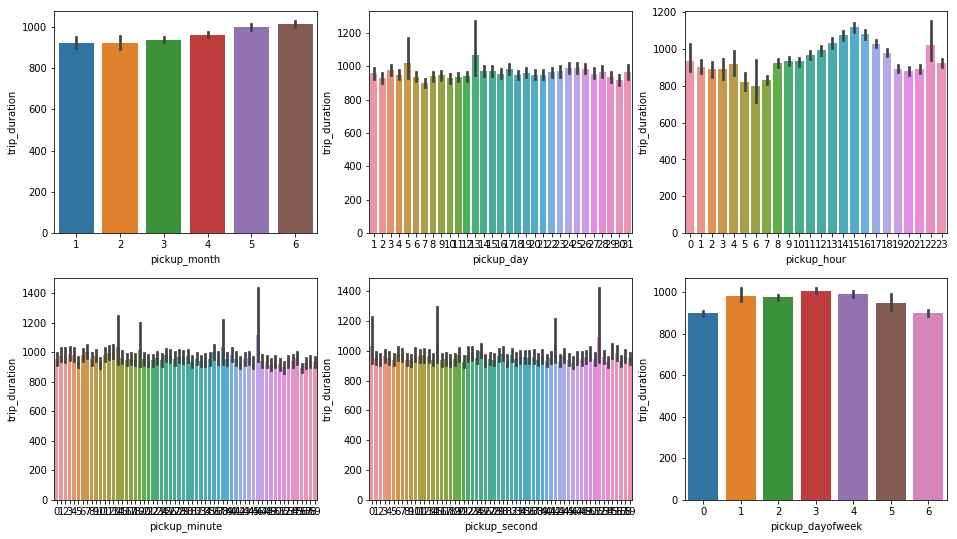

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(16,9)

sns.barplot(data = train, x = 'pickup_month', y = 'trip_duration', ax = ax1)
sns.barplot(data = train, x = 'pickup_day', y = 'trip_duration', ax = ax2)
sns.barplot(data = train, x = 'pickup_hour', y = 'trip_duration', ax = ax3)
sns.barplot(data = train, x = 'pickup_minute', y = 'trip_duration', ax = ax4)
sns.barplot(data = train, x = 'pickup_second', y = 'trip_duration', ax = ax5)
sns.barplot(data = train, x = 'pickup_dayofweek', y = 'trip_duration', ax = ax6)

#### 'vender_id, 'store_and_fwd_flag' for 'trip_duration

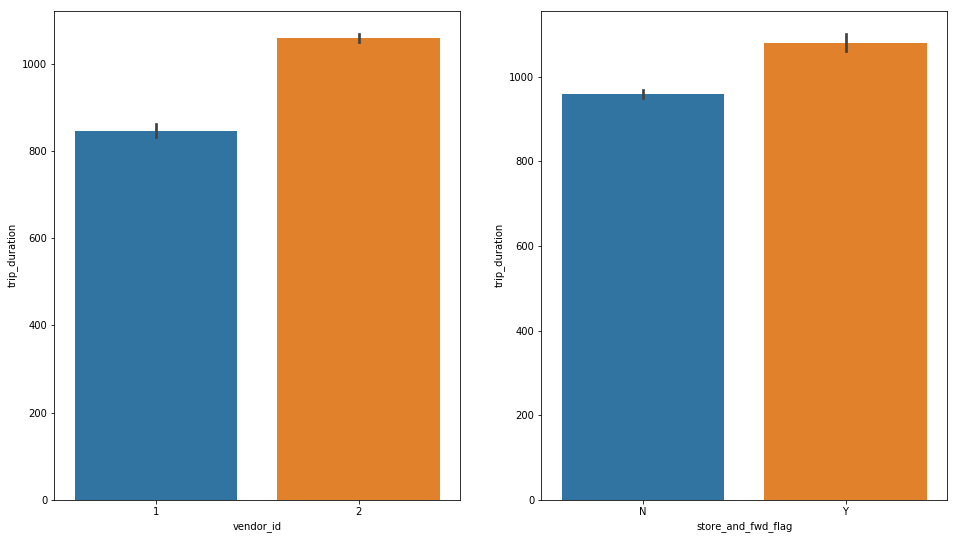

In [31]:
figure, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
figure.set_size_inches(16,9)

sns.barplot(data = train, x = 'vendor_id', y = 'trip_duration', ax = ax1)
sns.barplot(data = train, x = 'store_and_fwd_flag', y = 'trip_duration', ax = ax2)

#### 'passenger_count' for 'trip_duration'

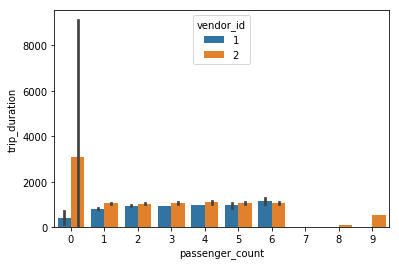

In [33]:
sns.barplot(data = train , hue = 'vendor_id', x = 'passenger_count', y= 'trip_duration' )

In [41]:
train.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_dayofweek,distance,man_dist3,man_distance,store_and_fwd_flag_Y,store_and_fwd_flag_N
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,14,17,24,55,0,1.497580,1.755698,1.755698,False,True
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,12,0,43,35,6,1.804374,2.450894,2.450894,False,True
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,19,11,35,24,1,6.381090,8.224048,8.224048,False,True
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,6,19,32,31,2,1.484566,1.661247,1.661247,False,True
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,26,13,30,55,5,1.187842,1.197531,1.197531,False,True


In [42]:
test.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_year,...,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_dayofweek,distance,man_dist3,man_distance,store_and_fwd_flag_Y,store_and_fwd_flag_N
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2016,...,30,23,59,58,3,2.744701,2.910823,2.910823,False,True
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2016,...,30,23,59,53,3,2.757507,3.104719,3.104719,False,True
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,2016,...,30,23,59,47,3,1.305335,1.857668,1.857668,False,True
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,2016,...,30,23,59,41,3,5.265780,7.191316,7.191316,False,True
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,2016,...,30,23,59,33,3,0.960239,1.363296,1.363296,False,True


### 4. select features and change data

#### 4-1) select features

In [43]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_year', 'pickup_month', 'pickup_day',
       'pickup_hour', 'pickup_minute', 'pickup_second', 'pickup_dayofweek',
       'distance', 'man_dist3', 'man_distance', 'store_and_fwd_flag_Y',
       'store_and_fwd_flag_N'],
      dtype='object')

In [44]:
test.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'pickup_year', 'pickup_month',
       'pickup_day', 'pickup_hour', 'pickup_minute', 'pickup_second',
       'pickup_dayofweek', 'distance', 'man_dist3', 'man_distance',
       'store_and_fwd_flag_Y', 'store_and_fwd_flag_N'],
      dtype='object')

In [45]:
feature_names = [ 'vendor_id',
                 'passenger_count', 'pickup_longitude', 'pickup_latitude',
                 'dropoff_longitude', 'dropoff_latitude',
                 'pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour', 
                 'pickup_minute', 'pickup_second', 'pickup_dayofweek',
                 'store_and_fwd_flag_Y', 'store_and_fwd_flag_N','man_distance' ]

#### 4-2) data change

In [46]:
x_train = train[feature_names]
print(x_train.shape)
x_train.head()

(1458644, 16)


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_dayofweek,store_and_fwd_flag_Y,store_and_fwd_flag_N,man_distance
0,2,1,-73.982155,40.767937,-73.964630,40.765602,2016,3,14,17,24,55,0,False,True,1.755698
1,1,1,-73.980415,40.738564,-73.999481,40.731152,2016,6,12,0,43,35,6,False,True,2.450894
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2016,1,19,11,35,24,1,False,True,8.224048
3,2,1,-74.010040,40.719971,-74.012268,40.706718,2016,4,6,19,32,31,2,False,True,1.661247
4,2,1,-73.973053,40.793209,-73.972923,40.782520,2016,3,26,13,30,55,5,False,True,1.197531


In [47]:
x_test = test[feature_names]
print(x_test.shape)
x_test.head(5)

(625134, 16)


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_dayofweek,store_and_fwd_flag_Y,store_and_fwd_flag_N,man_distance
0,1,1,-73.988129,40.732029,-73.990173,40.756680,2016,6,30,23,59,58,3,False,True,2.910823
1,1,1,-73.964203,40.679993,-73.959808,40.655403,2016,6,30,23,59,53,3,False,True,3.104719
2,1,1,-73.997437,40.737583,-73.986160,40.729523,2016,6,30,23,59,47,3,False,True,1.857668
3,2,1,-73.956070,40.771900,-73.986427,40.730469,2016,6,30,23,59,41,3,False,True,7.191316
4,1,1,-73.970215,40.761475,-73.961510,40.755890,2016,6,30,23,59,33,3,False,True,1.363296


In [48]:
y_train = train['trip_duration']
print(y_train.shape)
y_train.head()

(1458644,)


0     455
1     663
2    2124
3     429
4     435
Name: trip_duration, dtype: int64

### 5. Machine Learning

#### Evaluation Metric : RMSLE

In [ ]:
# before learning it, should take something it 

In [49]:
import numpy as np

y_train = np.log(y_train+1)
print(y_train.shape)
y_train.head()

# it will show better score

(1458644,)


0    6.122493
1    6.498282
2    7.661527
3    6.063785
4    6.077642
Name: trip_duration, dtype: float64

#### 5-1) Decision Tree

In [58]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 37)
model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=37, splitter='best')

In [59]:
model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=37, splitter='best')

#### *** after fitting model must do this thing

In [ ]:
## predictions = np.exp(predictions) - 1
## predictions[0:10]

In [60]:
predictions = model.predict(x_test)
predictions = np.exp(predictions) - 1
print(predictions.shape)
predictions[0:10]

(625134,)


array([  873.,  1067.,   531.,  1136.,   398.,  1423.,  1312.,   545.,
        1657.,   518.])

#### submit 

In [ ]:
submission = pd.read_csv("sample_submission.csv")
submission['trip_duration'] = predictions

submission.to_suv("DecisionTree.csv", index = False)

### * Cross Validation
####  U will wondering am i doing right ? before get scoring
#### that moment Cross Validation help U
#### this competition Evaluation Function is EMSLE so makes function like that

In [17]:

import numpy as np
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
# log_predict = np.log(predict + 1)
# log_actual = np.log(actual + 1)
    log_predict = predict + 1
    log_actual = actual + 1
    difference = log_predict - log_actual
    difference = np.square(difference)  
    mean_difference = difference.mean() 
    score = np.sqrt(mean_difference)
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

#### 5-2) Random Forest

In [2]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=12)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=12, verbose=0, warm_start=False)

In [ ]:
## if U want to modify parameters 
## Do it like that and add some parameters or modify something u want

# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(random_state=50, n_estimators = 600, max_depth = 10, n_jobs = 10)
# model

In [16]:
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=12, verbose=0, warm_start=False)

#### after fitting model and u can confirm the Score preview using Cross Validation

#### U should know this Score just reference so don`t be sure of it 

In [18]:
# after fitting model and u can comfirm the Scroe preview using Cross Validation

from sklearn.model_selection import cross_val_score

score = cross_val_score(model, x_train, y_train, cv = 3, scoring=rmsle_scorer).mean()
score

0.43806897321497446

In [23]:
predictions = model.predict(x_test)
predictions = np.exp(predictions) - 1
print(predictions.shape)
predictions[0:10]

(625134,)


array([  761.68502648,   449.25795221,   595.03987809,  1001.37481004,
        1031.47169878,   943.7277381 ,  1455.1148751 ,  1648.00838574,
        2123.46581658,   674.8264923 ])

#### submit

In [24]:
submission = pd.read_csv("data/sample_submission.csv")
submission["trip_duration"] = predictions

submission.to_csv("Random_Forest.csv", index=False)

In [30]:
import xgboost as xgb

print(xgb)

<module 'xgboost' from 'C:\\Anaconda3\\lib\\site-packages\\xgboost\\__init__.py'>


### 5-3) XGBoost

In [25]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators = 100, learning_rate = 0.01).fit(x_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, x_train, y_train, cv = 2, scoring=rmsle_scorer).mean()
score

2.3003408097383913

In [28]:
predictions = model.predict(x_test)
predictions = np.exp(predictions) - 1
print(predictions.shape)
predictions[:10]

(625134,)


array([  65.96507263,   78.66068268,   65.96507263,   65.96507263,
         65.96507263,   65.96507263,   73.97637177,   73.97637177,
        126.83488464,   65.96507263], dtype=float32)

#### submit

In [ ]:
submission = pd.read_csv("sample_submission.csv")
submission["trip_duration"] = predictions

submission.to_csv('XGBoost.csv', index = False)